<div class="alert alert-danger" role="alert">
<h1 align="center"><font size = 14>LinearRegression-Regularization</font></h1>
<h4 align="center">September 18-2024<h4>
<h3 align="center">Armin Amani</h3>

<div class="alert alert-danger" role="alert">
📤 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

<div class="alert alert-danger" role="alert"> 
💾 Read CSV file

In [2]:
df = pd.read_csv('houses.csv')
df

,size(sqft),bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


In [3]:
df.head()

,size(sqft),bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [4]:
np.sort(df['size(sqft)'].unique())

array([ 788.,  803.,  816.,  848.,  864.,  882.,  904.,  948.,  952.,
        960.,  972., 1004., 1026., 1029., 1040., 1050., 1056., 1073.,
       1088., 1092., 1096., 1097., 1120., 1150., 1159., 1164., 1180.,
       1200., 1208., 1212., 1215., 1216., 1220., 1224., 1244., 1314.,
       1316., 1349., 1358., 1392., 1419., 1430., 1431., 1432., 1446.,
       1456., 1470., 1484., 1486., 1506., 1541., 1547., 1552., 1553.,
       1557., 1571., 1593., 1603., 1616., 1652., 1654., 1656., 1660.,
       1682., 1694., 1725., 1764., 1768., 1775., 1784., 1790., 1836.,
       1840., 1851., 1935., 1947., 1953., 1959., 1983., 2030., 2090.,
       2482., 2599., 3194.])

In [5]:
np.sort(df['bedrooms'].unique())

array([0., 1., 2., 3., 4.])

In [6]:
df['floors'].unique()

array([1., 2.])

In [7]:
np.sort(df['age'].unique())

array([ 12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  35.,  37.,  39.,  42.,
        43.,  44.,  45.,  49.,  51.,  52.,  53.,  55.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  73.,  74.,  80.,  84.,
        87.,  97.,  99., 100., 107.])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size(sqft)  100 non-null    float64
 1   bedrooms    100 non-null    float64
 2   floors      100 non-null    float64
 3   age         100 non-null    float64
 4   price       100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [9]:
df.isnull().sum()

size(sqft)    0
bedrooms      0
floors        0
age           0
price         0
dtype: int64

<div class="alert alert-danger" role="alert"> 
🔎 Data Visualize

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

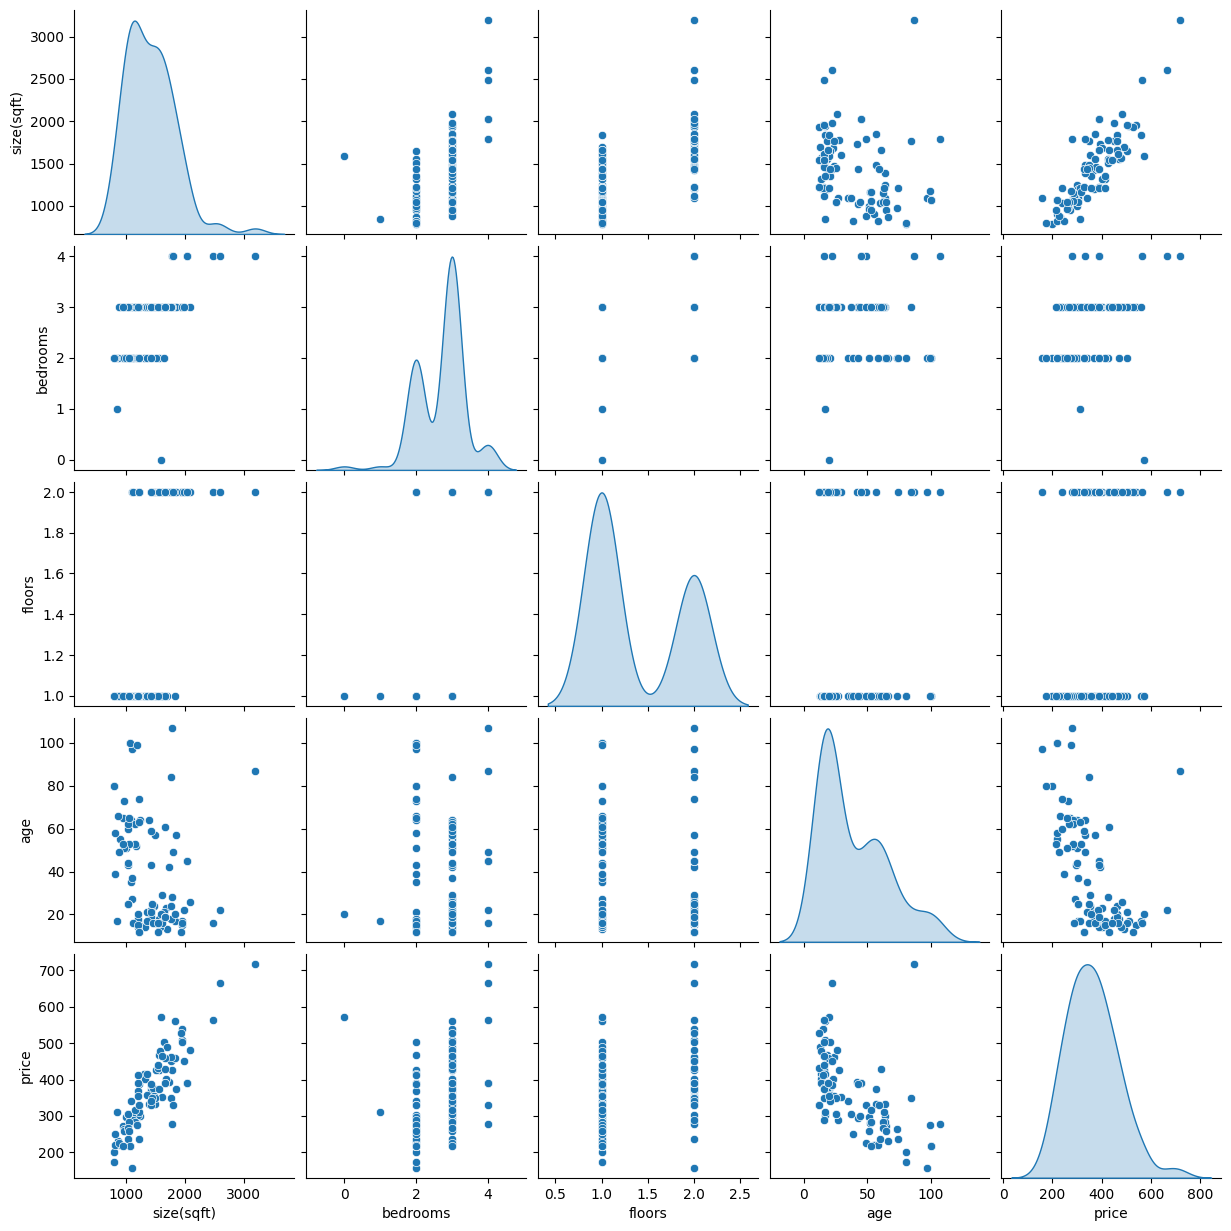

In [10]:
sns.pairplot(data=df,diag_kind='kde')

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='size(sqft)', ylabel='price'>

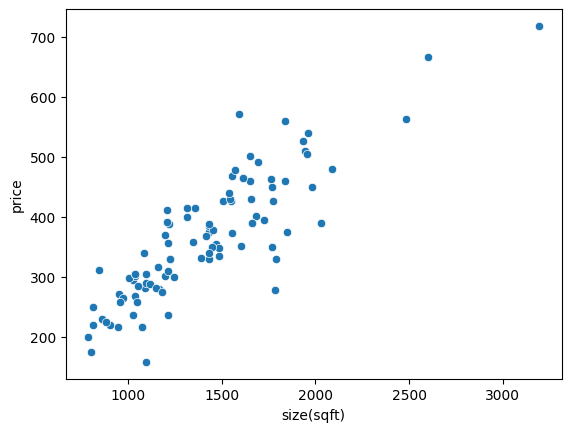

In [11]:
sns.scatterplot(data=df,x='size(sqft)',y='price')

* **the price of house will be increse when the size of the house gonne increase**

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='bedrooms', ylabel='price'>

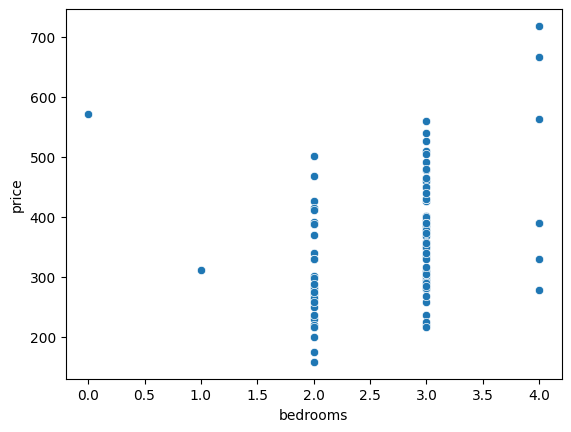

In [12]:
sns.scatterplot(data=df,x='bedrooms',y='price')

* **when the number of bedrooms is below the 3 like 2 bedrooms we have the price that below the 200 and at 4 bedrooms we have house more than 700**

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='floors', ylabel='price'>

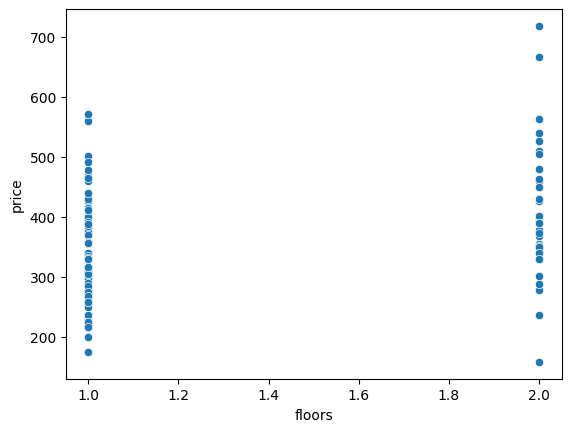

In [13]:
sns.scatterplot(data=df,x='floors',y='price')

* **the price of houses with 2 floors is more than price of houses with just a floors and in 2 floors we have houses with 600 and more than 600 and 700 too**

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age', ylabel='price'>

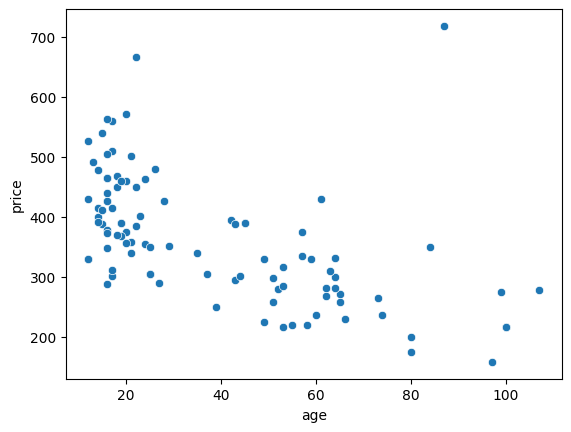

In [14]:
sns.scatterplot(data=df,x='age',y='price')

* **when the age of the houses gonna higher the price of that houses gonna decreases**

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


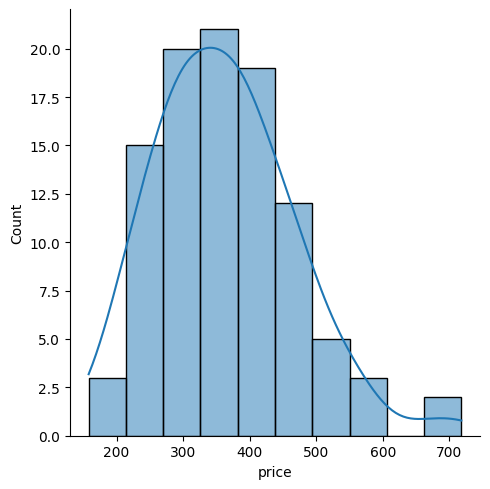

In [15]:
sns.displot(data=df,x='price',kde='True')

In [16]:
print(f"skewness od data is : {np.round(df['price'].skew(),3)}")

skewness od data is : 0.66


<Axes: >

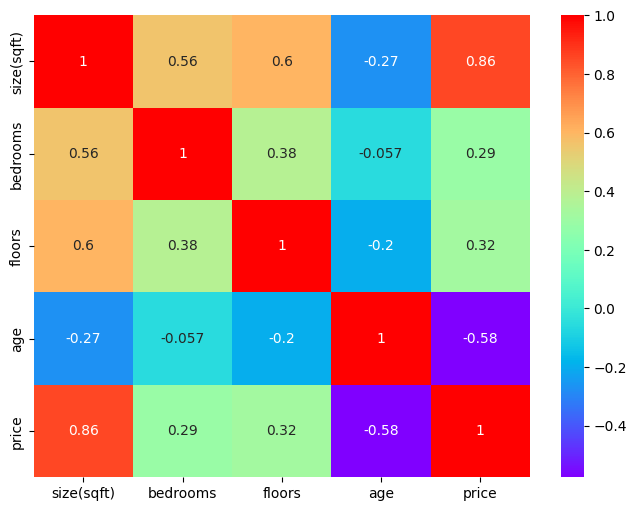

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.rainbow)

<div class="alert alert-danger" role="alert"> 
🔎 Seperate X & Y

In [18]:
X = df.drop('price',axis=1)
X

,size(sqft),bedrooms,floors,age
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0
...,...,...,...,...
95,1224.0,2.0,2.0,12.0
96,1432.0,2.0,1.0,43.0
97,1660.0,3.0,2.0,19.0
98,1212.0,3.0,1.0,20.0


In [19]:
Y = df['price']
Y

0     271.5
1     300.0
2     509.8
3     394.0
4     540.0
      ...  
95    329.0
96    388.0
97    390.0
98    356.0
99    257.8
Name: price, Length: 100, dtype: float64

<div class="alert alert-danger" role="alert"> 
🔎 train and test split

In [20]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [21]:
print(f"shape of x_train is : {x_train.shape}")
print(f"shape of x_test is : {x_test.shape}")
print(f"shape of y_train is : {y_train.shape}")
print(f"shape of y_train is : {y_test.shape}")

shape of x_train is : (80, 4)
shape of x_test is : (20, 4)
shape of y_train is : (80,)
shape of y_train is : (20,)


<div class="alert alert-danger" role="alert"> 
🔎 Create the model

In [22]:
LR_model = LinearRegression()
LR_model

LinearRegression()

In [23]:
LR_model.fit(x_train,y_train)

LinearRegression()

In [24]:
print(f"theta is : {LR_model.coef_}")
print("-----------------------------------------------\n-----------------------------------------------")
print(f"theta0 is : {LR_model.intercept_}")

theta is : [  0.26618701 -33.38750502 -67.37775474  -1.36733828]
-----------------------------------------------
-----------------------------------------------
theta0 is : 222.3200392079512


<div class="alert alert-danger" role="alert"> 
🔎 prediction

In [25]:
y_predic = LR_model.predict(x_test)
y_predic

array([324.03661268, 298.40675938, 237.05210788, 237.05210788,
       463.06056408, 329.92190094, 403.29302292, 372.39538357,
       227.9085243 , 432.84391619, 353.09288785, 296.19540245,
       485.38783149, 615.75310485, 402.17588724, 293.51985794,
       453.81682521, 486.06581842, 389.14639819, 226.07025406])

<div class="alert alert-danger" role="alert"> 
🔎 Loss Function

In [26]:
MAE = metrics.mean_absolute_error(y_test,y_predic)
MAE

19.05845665984375

In [27]:
MSE = metrics.mean_squared_error(y_test,y_predic)
MSE

571.3096278300106

In [28]:
RMSE = np.sqrt(MSE)
RMSE

23.902084173352137

<div class="alert alert-danger" role="alert"> 
🔎 Now I want to use Regularization

In [29]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [30]:
model_RCv = RidgeCV(alphas=(1,2,3,4,5,6,10,12,13,20,30,50), cv=5)
model_RCv

RidgeCV(alphas=(1, 2, 3, 4, 5, 6, 10, 12, 13, 20, 30, 50), cv=5)

In [31]:
model_RCv.fit(x_train,y_train)

RidgeCV(alphas=(1, 2, 3, 4, 5, 6, 10, 12, 13, 20, 30, 50), cv=5)

In [32]:
y_pred_RCv = model_RCv.predict(x_test)
y_pred_RCv

array([322.76327894, 297.5494845 , 235.82611684, 235.82611684,
       460.80259353, 328.69852914, 405.52676464, 370.60420099,
       227.52661724, 434.61491308, 356.12223173, 295.9347055 ,
       486.48571933, 615.33439089, 403.63174863, 292.98472684,
       451.73560922, 487.23740687, 391.10598127, 225.88238295])

In [33]:
Ridge_cv_MSE = metrics.mean_squared_error(y_test,y_pred_RCv)
Ridge_cv_MSE

567.7671953052728

In [34]:
model_RCv.alpha_

1

In [35]:
coefficient_list = model_RCv.coef_
coefficient_list

array([  0.26230078, -32.38797987, -62.71223702,  -1.36827539])

In [36]:
def non_zero(list_modelRCv):
    count = 0
    for i in list_modelRCv:
        if i!=0.0:
            count+=1
    print(count)

In [37]:
non_zero(coefficient_list)

4


<div class="alert alert-danger" role="alert"> 
🔎 Scalling Data


In [38]:
scaler = StandardScaler()
scaler

StandardScaler()

In [39]:
scaler.fit(x_train)

StandardScaler()

In [40]:
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

<div class="alert alert-danger" role="alert"> 
🔎 Sketch-Loss Function

In [41]:
def loss_func(x,y,theta,theta0,landa):
    m=x.shape[0]
    h=np.dot(x,theta)+theta0
    error=h - y
    j=(1/(2*m))*(np.sum(error**2) + landa*(np.sum(theta**2)))
    return j,error

<div class="alert alert-danger" role="alert"> 
🔎 GD

In [42]:
j_hist = [0.0001]

In [43]:
n_iters = 10000
j_h = np.ones((n_iters,2))

In [82]:
def gradient(alpha,x,y,n_iters,landa):
    m=x.shape[0]
    theta=np.ones(x.shape[1])
    theta0=0
    
    for iter in range(0,n_iters):
        j,error=loss_func(x,y,theta,theta0,landa)
        
        j_hist.append(j)
        print("iter:",iter,"j:",j)

        j_h[iter,0] = iter
        j_h[iter,1] = j

        if(j_hist[iter+1]-j_hist[iter]==0):
            break
        dj_dtheta=1/m *np.dot(x.T,error) + (landa*theta)
        dj_dtheta0=1/m * np.sum(error)
        theta=theta-alpha*dj_dtheta
        theta0=theta0-alpha*dj_dtheta0
    return theta,theta0

In [121]:
theta,theta0 = gradient(alpha=1e-2,x=x_train_s,y=y_train,n_iters=n_iters,landa=1e-8)

iter: 0 j: 70320.61772214012
iter: 1 j: 68914.77511028656
iter: 2 j: 67538.0584280694
iter: 3 j: 66189.83772588981
iter: 4 j: 64869.49758405292
iter: 5 j: 63576.43674613337
iter: 6 j: 62310.06776263713
iter: 7 j: 61069.81664463827
iter: 8 j: 59855.12252708062
iter: 9 j: 58665.43734144499
iter: 10 j: 57500.225497492254
iter: 11 j: 56358.963573802685
iter: 12 j: 55241.14001684108
iter: 13 j: 54146.254848286604
iter: 14 j: 53073.81938037474
iter: 15 j: 52023.35593900721
iter: 16 j: 50994.3975943939
iter: 17 j: 49986.487898998916
iter: 18 j: 48999.18063256986
iter: 19 j: 48032.03955403739
iter: 20 j: 47084.63816007856
iter: 21 j: 46156.55945014491
iter: 22 j: 45247.39569776197
iter: 23 j: 44356.748227914075
iter: 24 j: 43484.22720033371
iter: 25 j: 42629.45139852108
iter: 26 j: 41792.048024324744
iter: 27 j: 40971.652497920346
iter: 28 j: 40167.90826302883
iter: 29 j: 39380.46659722157
iter: 30 j: 38608.98642716405
iter: 31 j: 37853.134148655015
iter: 32 j: 37112.583451322185
iter: 33 j: 3

<div class="alert alert-danger" role="alert"> 
🔎 LR plot

In [122]:
y_prediction = x_test_s[:,[0]] * theta[0] + theta0

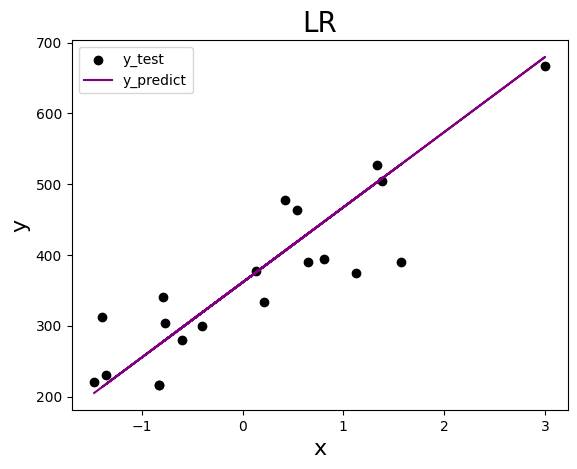

In [123]:
plt.scatter(x_test_s[:,[0]],y_test,color='k',label='y_test')
plt.plot(x_test_s[:,[0]],y_prediction,color='purple',label='y_predict')
plt.title('LR',fontsize=20)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.legend()
plt.show()

<div class="alert alert-danger" role="alert"> 
🔎 Learning Plot

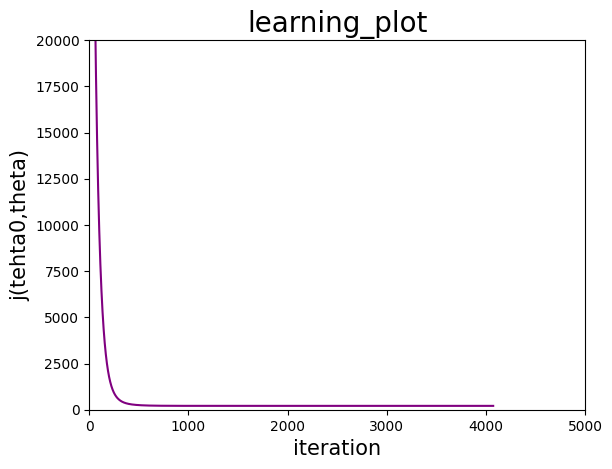

In [126]:
plt.plot(j_h[:4074,[0]],j_h[:4074,[1]],color='purple',label='Lerning_plot')
plt.xlim([0,5000])
plt.ylim([0,20000])
plt.title('learning_plot',fontsize=20)
plt.xlabel('iteration',fontsize=15)
plt.ylabel('j(tehta0,theta)',fontsize=15)
plt.show()

In [127]:
j,_ = loss_func(x_test_s,y_test,theta,theta0,landa=1e-9)

In [128]:
MSE

571.3096278300106

In [129]:
Ridge_cv_MSE

567.7671953052728

In [130]:
j

285.65482265374163